In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import re

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
#from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.neighbors import NearestCentroid
#from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, HistGradientBoostingRegressor

from sklearn import metrics
from sklearn import tree

from statistics import mean

In [2]:
df = pd.DataFrame([[0,1,2],[0,1,2]], columns=list('abc'))

print(df.head())

   a  b  c
0  0  1  2
1  0  1  2


In [3]:
aa = []

aa.append([0,1,2])
aa.append([0,2,1])

print(aa)

df = pd.DataFrame(aa, columns=list('abc'))

print(df.head())

[[0, 1, 2], [0, 2, 1]]
   a  b  c
0  0  1  2
1  0  2  1


In [4]:
for i in range(0, 1):
    print("zero")

zero


# Dane

## Wczytywanie

In [5]:
dane = pd.read_csv("data.csv")




In [6]:
print(dane.info())
print(dane.shape)
print(dane.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0.1       890 non-null    int64  
 1   Unnamed: 0         890 non-null    int64  
 2   brand              890 non-null    object 
 3   name               890 non-null    object 
 4   price              890 non-null    int64  
 5   spec_rating        890 non-null    float64
 6   processor          890 non-null    object 
 7   CPU                890 non-null    object 
 8   Ram                890 non-null    object 
 9   Ram_type           890 non-null    object 
 10  ROM                890 non-null    object 
 11  ROM_type           890 non-null    object 
 12  GPU                890 non-null    object 
 13  display_size       890 non-null    float64
 14  resolution_width   890 non-null    float64
 15  resolution_height  890 non-null    float64
 16  OS                 890 non

## Obróbka

In [7]:
# wstępne oczyszczanie
# opracowane na podstawie wielu spojrzeń na dane, i nadużyciu funkcji print()
dane = dane.drop(['Unnamed: 0.1', 'Unnamed: 0', 'name'], axis=1) # zastanów się nad usuwaniem name
dane['Ram'] = dane['Ram'].str.replace('GB', '')
dane['ROM'] = dane['ROM'].str.replace('GB', '')
dane['ROM'] = dane['ROM'].str.replace('TB', '000')
dane['OS'] = dane['OS'].str.replace('  ', ' ')
dane['CPU'] = dane['CPU'].str.replace('Dual Core', '2 Cores')
dane['CPU'] = dane['CPU'].str.replace('Quad Core', '4 Cores')
dane['CPU'] = dane['CPU'].str.replace('Octa Core', '8 Cores')
dane['CPU'] = dane['CPU'].str.replace('Hexa Core', '16 Cores')


dane['GPU'] = dane['GPU'].str.replace('Nvidia', 'NVIDIA')
dane['GPU'] = dane['GPU'].str.replace('Geforce', 'GeForce') # keep
#dane['GPU'] = dane['GPU'].str.replace('GEFORCE', 'GeForce') # don't
dane['GPU'] = dane['GPU'].str.replace('RTX RTX', 'RTX')


dane['GPU'] = dane['GPU'].str.replace('Integrated Intel', 'Intel')  # keep
dane['GPU'] = dane['GPU'].str.replace('Iris Xe Graphics', 'Iris Xe')    # keep
dane['GPU'] = dane['GPU'].str.replace('Integrated Iris', 'Iris')
dane['GPU'] = dane['GPU'].str.replace('UHD Graphics', 'UHD')
dane['GPU'] = dane['GPU'].str.replace('Intel Integrated Intel', 'Intel')
dane['GPU'] = dane['GPU'].str.replace('Integrated UHD', 'UHD')
dane['GPU'] = dane['GPU'].str.replace('Intel Graphics', 'Intel Integrated')
dane['GPU'] = dane['GPU'].str.replace('Integrated Integrated', 'Integrated')
#dane['GPU'] = dane['GPU'].str.replace('Intel Integrated', 'Intel Integrated Graphics')
dane['GPU'] = dane['GPU'].str.replace('Intel Intel', 'Intel')




# spacje do wywalenia, poprawka jak w procesorach
#dane['GPU'] = dane['GPU'].str.replace('Intel Integrated Graphics', 'Intel Integrated')
#dane['GPU'] = dane['GPU'].str.replace('Intel Integrated ', 'Intel Integrated')
#dane['GPU'] = dane['GPU'].str.replace('Intel Iris Xe ', 'Intel Iris Xe')
#dane['GPU'] = dane['GPU'].str.replace('Intel UHD ', 'Intel UHD')


dane['GPU'] = dane['GPU'].str.replace('RX 6500M Graphics', 'RX 6500M')
dane['GPU'] = dane['GPU'].str.replace('AMD Radeon AMD', 'AMD Radeon')
dane['GPU'] = dane['GPU'].str.replace('AMD Radeon Radeon', 'AMD Radeon')
dane['GPU'] = dane['GPU'].str.replace('AMD Radeon Graphics', 'AMD Radeon')
dane['GPU'] = dane['GPU'].str.replace('M Graphics', 'M')
dane['GPU'] = dane['GPU'].str.replace('Vega 7 Graphics', 'Vega 7')
dane['GPU'] = dane['GPU'].str.replace('Vega 8 Graphics', 'Vega 8')

dane['GPU'] = dane['GPU'].str.replace('-core', '-Core')


dane['price'] *= 0.047


In [8]:
dane.describe()


,price,spec_rating,display_size,resolution_width,resolution_height,warranty
count,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000
mean,3760.017797,69.377330,15.176854,2035.685393,1218.737079,1.079775
std,2862.893310,5.550630,0.932806,425.822399,326.841373,0.327474
min,469.953000,60.000000,11.600000,1080.000000,768.000000,0.000000
25%,2103.837500,66.000000,14.000000,1920.000000,1080.000000,1.000000
50%,2913.530000,69.323529,15.600000,1920.000000,1080.000000,1.000000
75%,4270.655000,71.000000,15.600000,1920.000000,1200.000000,1.000000
max,21151.833000,89.000000,18.000000,3840.000000,3456.000000,3.000000


In [9]:
# złączenie par z resolution
aaa = []

for i in range(0, dane.shape[0]):
    temp = []
    if dane.loc[i, 'resolution_height'] > dane.loc[i, 'resolution_width']:   #głupie dane
        tmp = dane.loc[i, 'resolution_height']
        dane.loc[i, 'resolution_height'] = dane.loc[i, 'resolution_width']
        dane.loc[i, 'resolution_width'] = tmp
    temp.append(str(int(dane.loc[i, 'resolution_width'])))
    temp.append(str(int(dane.loc[i, 'resolution_height'])))
    x = "x".join(temp)
    aaa.append("x".join(temp))


In [10]:
cores = []
threads = []
for i in range(0, dane.shape[0]):
    core = dane.loc[i, 'CPU']
    if "Core" in core:
        core = core[0:2]
        core = re.sub(" ", "", core)
    else:
        core = ""
    cores.append(core)

    thread = dane.loc[i, 'CPU']
    if "Thread" in thread:
        thread = thread[-10:-1]
        thread = re.sub(" Thread", "", thread)
        thread = re.sub(" ", "", thread)
    else:
        thread = ""
    threads.append(thread)

In [11]:
dfToAdd = pd.DataFrame({ 'resolution': aaa, 'cores': cores, 'threads': threads})


In [12]:
dane = pd.concat([dane, dfToAdd], axis=1).drop(['resolution_width', 'resolution_height', 'CPU'], axis=1)
dane.dropna()
dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         890 non-null    object 
 1   price         890 non-null    float64
 2   spec_rating   890 non-null    float64
 3   processor     890 non-null    object 
 4   Ram           890 non-null    object 
 5   Ram_type      890 non-null    object 
 6   ROM           890 non-null    object 
 7   ROM_type      890 non-null    object 
 8   GPU           890 non-null    object 
 9   display_size  890 non-null    float64
 10  OS            890 non-null    object 
 11  warranty      890 non-null    int64  
 12  resolution    890 non-null    object 
 13  cores         890 non-null    object 
 14  threads       890 non-null    object 
dtypes: float64(3), int64(1), object(11)
memory usage: 104.4+ KB


In [13]:
print(dane.dtypes)

brand            object
price           float64
spec_rating     float64
processor        object
Ram              object
Ram_type         object
ROM              object
ROM_type         object
GPU              object
display_size    float64
OS               object
warranty          int64
resolution       object
cores            object
threads          object
dtype: object


In [14]:
print(dane["GPU"].unique())

['4GB AMD Radeon RX 6500M' 'Intel UHD' 'Intel Iris Xe'
 'Apple M1 Integrated Graphics' '6GB NVIDIA GeForce RTX 4050'
 '4GB NVIDIA GeForce RTX 3050' 'AMD Radeon' '4GB NVIDIA GeForce RTX 2050'
 '4GB NVIDIA GeForce GTX 1650' 'AMD Radeon Vega 7' '8-Core GPU'
 'AMD Integrated' '8GB NVIDIA GeForce RTX 4070' 'AMD Graphics'
 '8GB NVIDIA GeForce RTX 3070 Ti' 'Intel Integrated'
 '6GB NVIDIA GeForce RTX 3050' 'Intel UHD ' '16GB NVIDIA GeForce RTX 4090'
 '8GB NVIDIA GeForce RTX 4060' '4GB NVIDIA GeForce RTX 3050 Ti'
 '4GB NVIDIA GeForce GTX 3050' '4GB NVIDIA Quadro T1000' 'Intel Iris Xe '
 'GB NVIDIA GeForce RTX 2050' '8GB NVIDIA GeForce RTX 3070 Ti '
 '10-Core GPU' '8GB AMD Radeon RX 6650M' 'Intel HD Graphics'
 'Intel UHD 600' 'NVIDIA GeForce RTX 4070' 'AMD Radeon 610M'
 'Intel Integrated ' 'AMD Radeon Vega 8' '4GB AMD Radeon Pro 5500M'
 'AMD Radeon ' '4GB NVIDIA GeForce GTX 2050'
 '4GB NVIDIA GeForce RTX 2050 ' '4GB NVIDIA GeForce RTX 3050 '
 '12GB NVIDIA GeForce RTX 4080' '30-Core GPU' '19-Core

In [15]:
for i in dane.columns:
    print("==="*30)
    print(i)
    print(dane[i].unique())

brand
['HP' 'Acer' 'Lenovo' 'Apple' 'Dell' 'Asus' 'Samsung' 'Ultimus' 'MSI'
 'Infinix' 'Wings' 'Honor' 'Zebronics' 'Xiaomi' 'iBall' 'Chuwi' 'Realme'
 'Avita' 'Walker' 'Huawei' 'Tecno' 'Gigabyte' 'Vaio' 'Microsoft' 'Fujitsu'
 'LG' 'Ninkear' 'Razer' 'AXL']
price
[ 2345.3    1875.3    1268.53   2807.263  3289.53   1879.53   1729.13
  3618.53   2302.53   3524.53   2349.53    516.53   3430.53   1409.53
  2521.503  1597.53   3759.53   3242.53   2161.53   4934.53   2584.53
  2330.26   2631.53   2067.53    932.95   1362.53   2584.953  3336.53
  2673.783  8454.36   2528.13   1785.53   4558.53   3383.53   2819.53
  2960.53   1456.53   1715.03   3665.53   1935.93   4229.53  18799.953
  1503.53   1480.03   3317.73   1127.53   1785.953  2490.53   1449.903
  2772.53   1644.53   2433.66   4041.53   7002.53   3971.03   2866.53
  1691.53   3101.53   2913.53   1738.53   2395.59   8694.953  5169.53
  2020.53   1840.05   4370.953  3806.53   2624.95   1832.53   2537.53
  6543.998  2725.53   4229.953  4370.

In [16]:
for i in sorted(dane.GPU.unique()):
    if "AMD" in i:
        print(i)

4GB AMD Radeon Pro 5500M
4GB AMD Radeon RX 5600M 
4GB AMD Radeon RX 6500M
4GB AMD Radeon RX 6550M
8GB AMD Radeon RX 6650M
AMD Graphics
AMD Integrated
AMD Integrated SoC
AMD Radeon
AMD Radeon 
AMD Radeon 610M
AMD Radeon 7 Graphics
AMD Radeon 780M
AMD Radeon Vega 6
AMD Radeon Vega 7
AMD Radeon Vega 8
AMD Radeon Vega 9
Integrated AMD Radeon


In [17]:

gpus = []
for i in dane.GPU:
    i = re.sub(r' \Z', "", i)     # usuwa pojedynczą spację
    if re.search("NVIDIA", i):
        if re.search("GeForce .TX", i):
            if i[-2:] == 'Ti':
                i = re.sub(r'\b[\w-]+\b(?=\s*$)', "", i)  
                i = re.sub(r'\b[\w-]+\b(?=\s*$)', "", i)  
                i = re.sub(r' \Z', "", i)
                i += 'Ti'
            elif i[-2:] == 'da':
                i = re.sub(r'\b[\w-]+\b(?=\s*$)', "", i)  
                i = re.sub(r'\b[\w-]+\b(?=\s*$)', "", i)  
                i = re.sub(r' \Z', "", i)
                i += 'Ada'
            elif i[-2:] != "TX":
                i = re.sub(r'\b[\w-]+\b(?=\s*$)', "", i)  
                i = re.sub(r'  \Z', "", i)
                i = re.sub(r' \Z', "", i)
    elif re.search("Intel.*UHD .*", i):
        i = re.sub(r'\b[\w-]+\b(?=\s*$)', "", i) 
    elif re.search("AMD Radeon .*M", i):
        i = re.sub(r'\b[\w-]+\b(?=\s*$)', "", i) 
    i = re.sub(r' \Z', "", i)
    gpus.append(i)


In [18]:
dane = dane.rename(columns={'GPU': 'graphics'})

In [19]:
dfToAdd = pd.DataFrame({'GPU' : gpus})
for i in dfToAdd.GPU.unique():
    if re.search(r' \Z', i):
        print(i)

In [20]:
dane = pd.concat([dane, dfToAdd], axis=1).drop('graphics', axis=1)

In [21]:
#print(dane.info())
#print(dane.head(10))

In [22]:
for i in sorted(dane.GPU.unique()):
    print(i)

10-Core GPU
12GB NVIDIA GeForce RTX
12GB NVIDIA GeForce RTX Ti
16-Core GPU
16GB NVIDIA GeForce RTX
16GB NVIDIA GeForce RTX Ti
19-Core GPU
2GB NVIDIA GeForce MX250
2GB NVIDIA GeForce MX350
2GB NVIDIA GeForce MX450
2GB NVIDIA GeForce MX570
30-Core GPU
32-Core GPU
4GB  NVIDIA GeForce RTX
4GB AMD Radeon Pro
4GB AMD Radeon RX
4GB Intel Arc A350M
4GB NVIDIA GeForce GTX
4GB NVIDIA GeForce GTX Ti
4GB NVIDIA GeForce MX130
4GB NVIDIA GeForce RTX
4GB NVIDIA GeForce RTX Ti
4GB NVIDIA Quadro T1000
4GB NVIDIA Quadro T600
4GB NVIDIA RTX 3050
4GB NVIDIA RTX A500
6GB NVIDIA GEFORCE RTX 4050
6GB NVIDIA GeForce RTX
8-Core GPU
8GB AMD Radeon RX
8GB NVIDIA GEFORCE RTX 4060
8GB NVIDIA GeForce RTX
8GB NVIDIA GeForce RTX Ada
8GB NVIDIA GeForce RTX Ti
8GB NVIDIA RTX 3000 Ada
AMD Graphics
AMD Integrated
AMD Integrated SoC
AMD Radeon
AMD Radeon 7 Graphics
AMD Radeon Vega 6
AMD Radeon Vega 7
AMD Radeon Vega 8
AMD Radeon Vega 9
Apple M1 Integrated Graphics
GB NVIDIA GeForce RTX
Integrated AMD Radeon
Intel HD Graph

In [23]:
print("dla łatwego odpalania powyższych komórek")

dla łatwego odpalania powyższych komórek


C:\Users\janma\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)


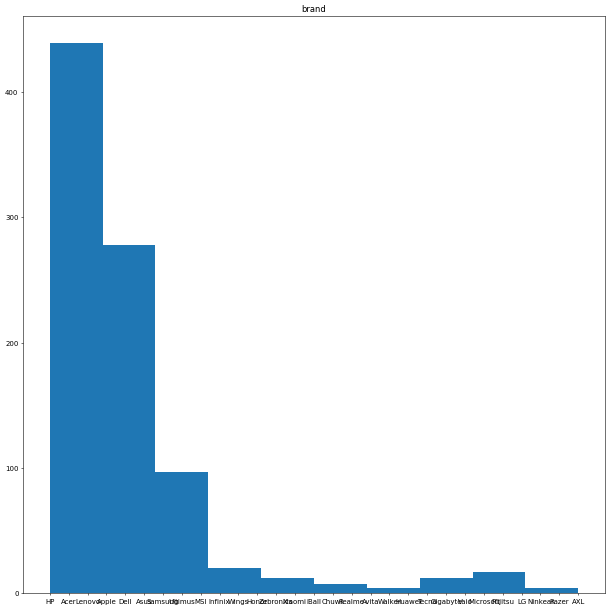

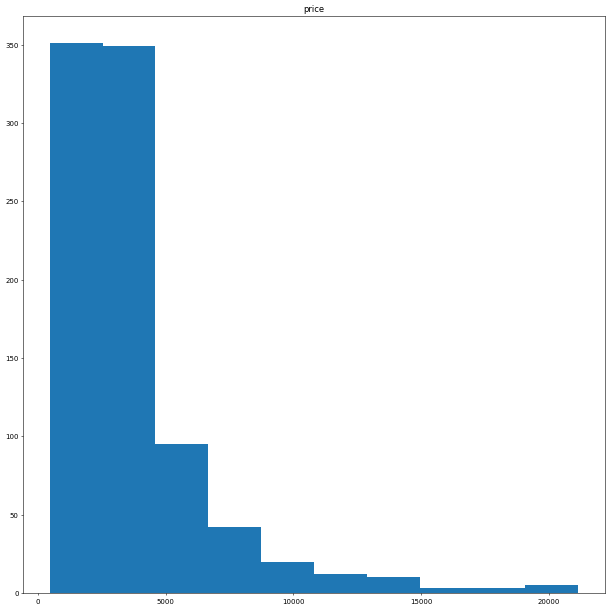

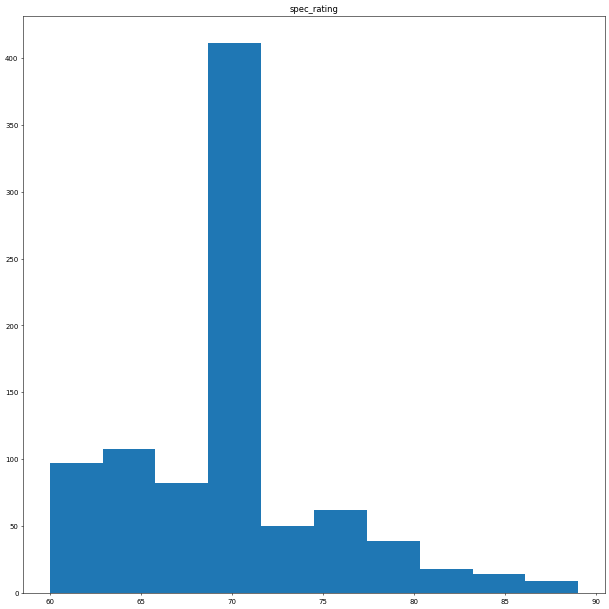

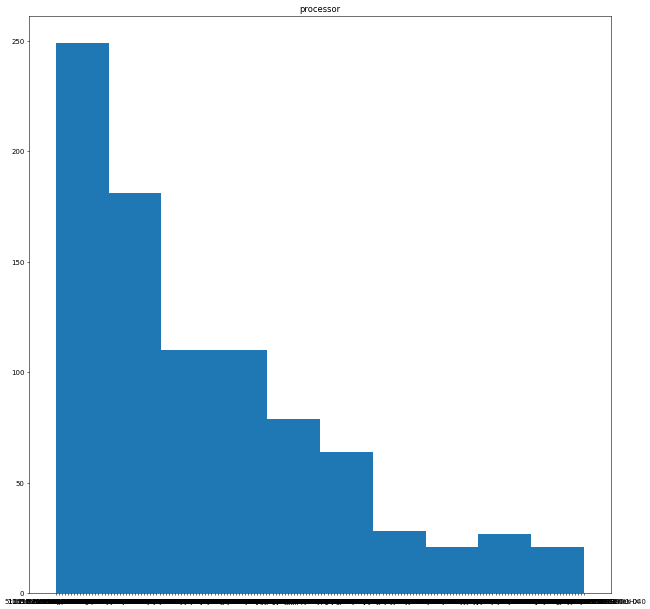

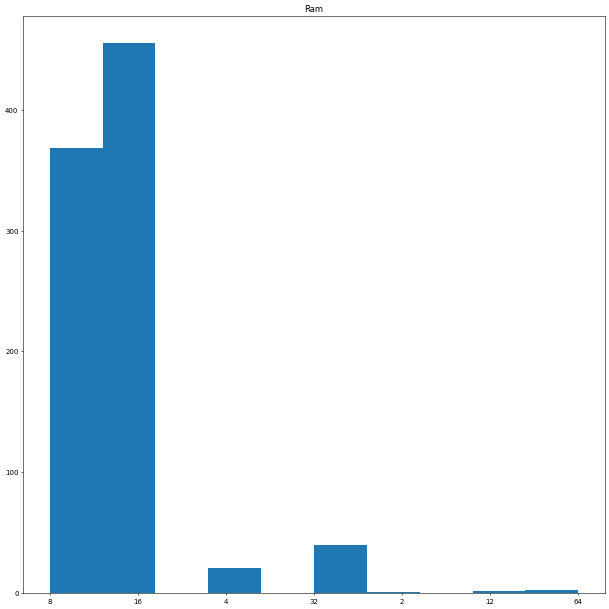

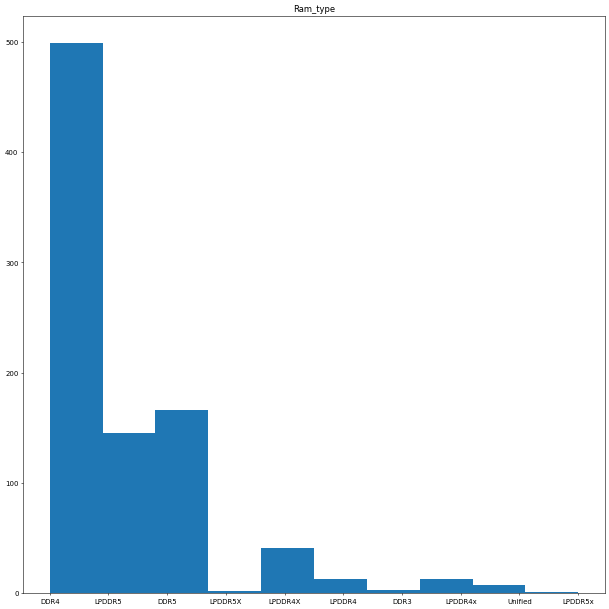

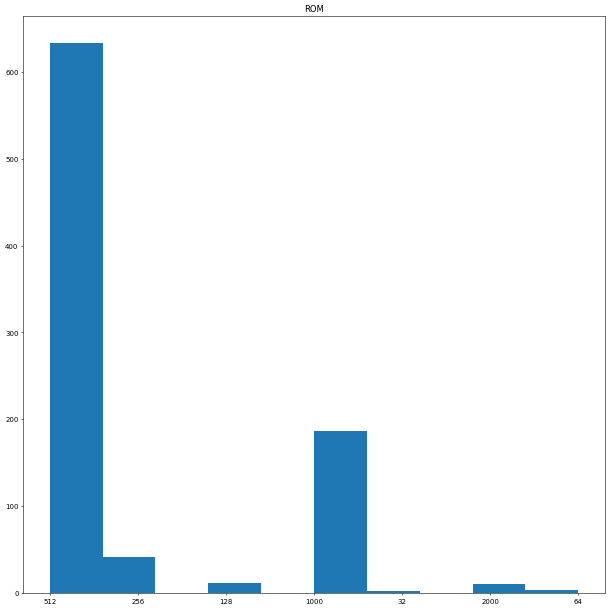

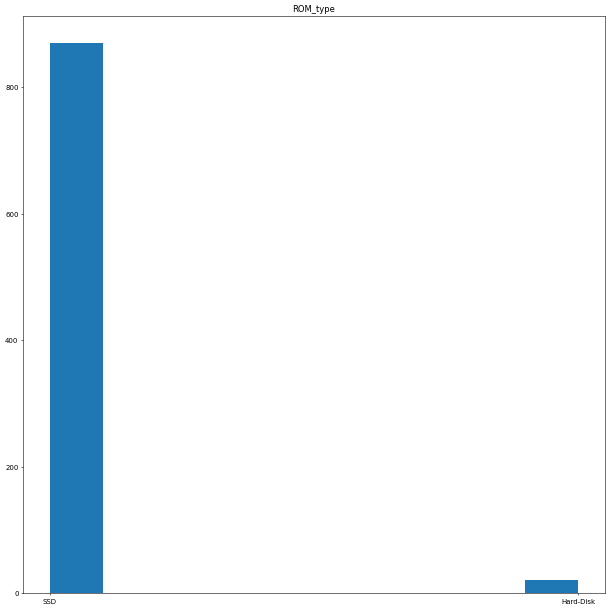

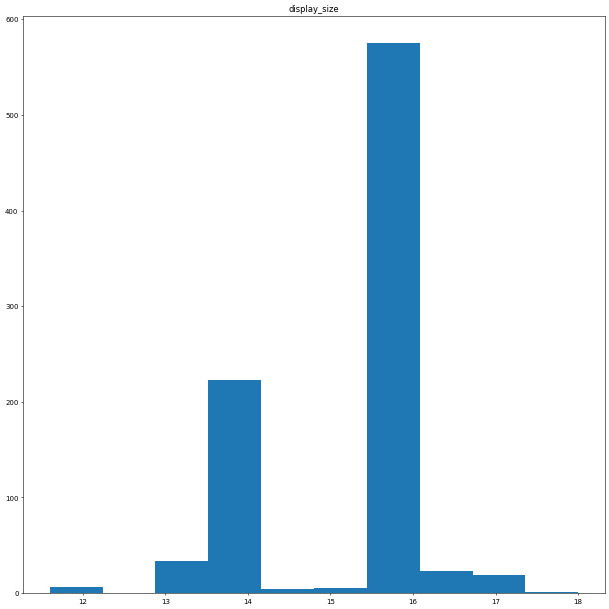

C:\Users\janma\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


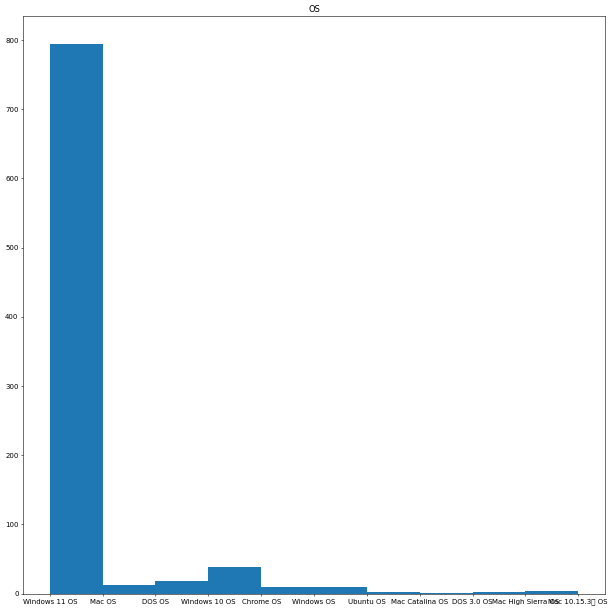

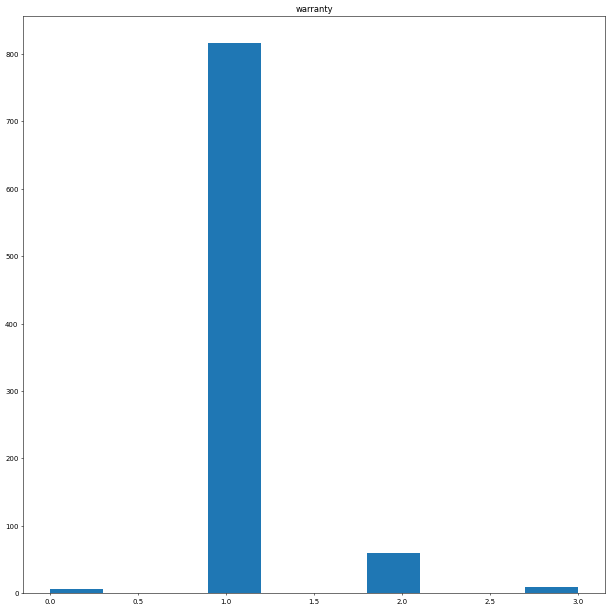

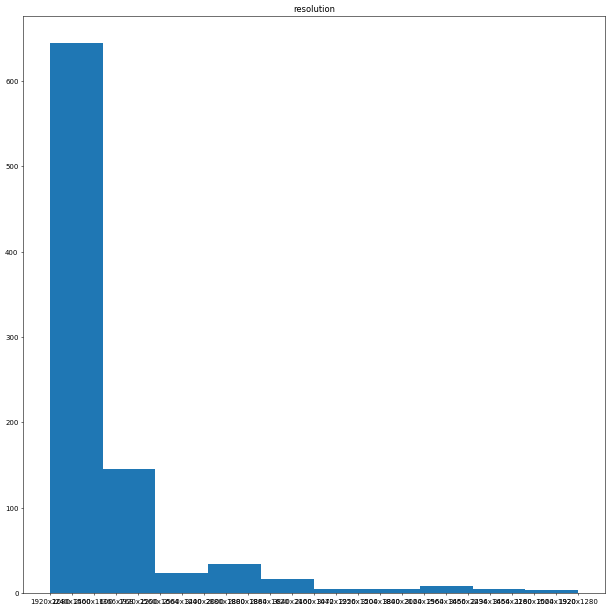

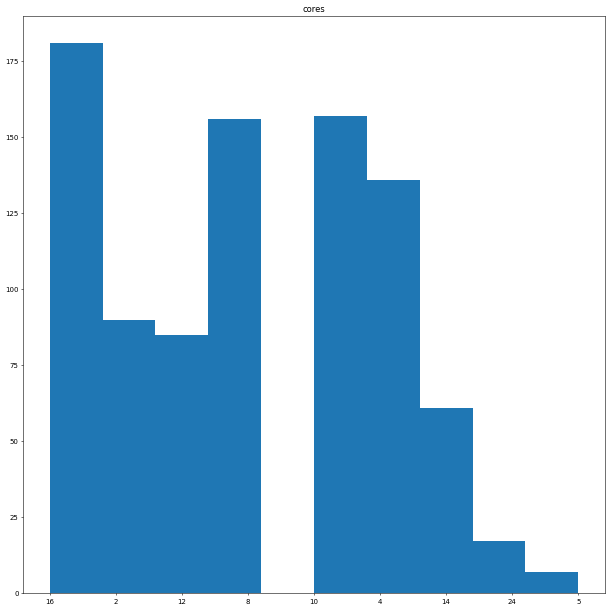

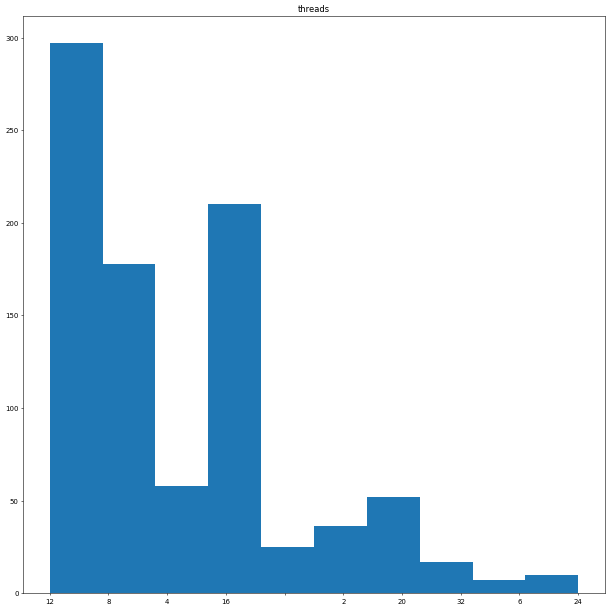

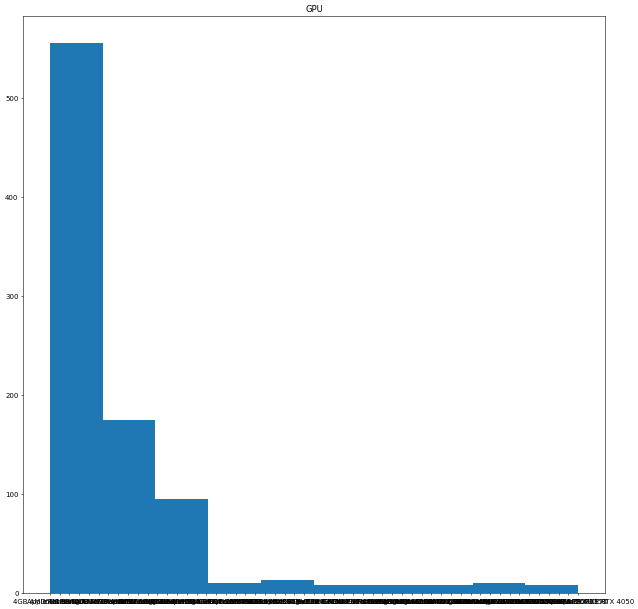

In [24]:
for i in dane.columns:
    plt.figure(figsize=(15,15), dpi=50)
    plt.title(i)
    plt.hist(dane[i])


In [25]:
plt.figure(figsize=(50,50), dpi=200)
plt.title("GPU")
plt.hist(dane['GPU'])

(array([555., 175.,  95.,  10.,  13.,   8.,   8.,   8.,  10.,   8.]),
 array([ 0. ,  5.4, 10.8, 16.2, 21.6, 27. , 32.4, 37.8, 43.2, 48.6, 54. ]),
 <BarContainer object of 10 artists>)

In [26]:
print(dane.GPU.mode())

cnt = 0
for i in dane.GPU:
    if i == "Intel Iris Xe": cnt +=1

print(cnt)

0    Intel Iris Xe
Name: GPU, dtype: object
202


In [27]:
dum = pd.get_dummies(dane)
x = dum.drop('price', axis=1)
y = dane.price

In [28]:
X_train, x_test, Y_train, y_test = train_test_split(x, y, test_size=0.2)
print(X_train, x_test, Y_train, y_test)

     spec_rating  display_size  warranty  brand_AXL  brand_Acer  brand_Apple  \
133    67.000000          15.6         1      False       False        False   
883    75.000000          15.6         1      False       False        False   
413    69.323529          15.6         1      False       False        False   
190    69.323529          14.0         1      False       False        False   
288    60.000000          15.6         1      False        True        False   
..           ...           ...       ...        ...         ...          ...   
286    83.000000          18.0         1      False       False        False   
448    77.000000          15.6         1      False       False        False   
560    89.000000          16.0         2      False       False        False   
192    67.000000          16.0         1      False       False        False   
282    65.000000          15.6         1      False        True        False   

     brand_Asus  brand_Avita  brand_Chu

In [29]:
reg = LinearRegression()

reg.fit(x, y)


LinearRegression()

In [30]:
pred = reg.predict(x)

rsq = r2_score(y, pred)
print(rsq)

print(cross_val_score(reg, x, y, cv=10).mean())
err_rms = metrics.mean_squared_error(y, pred, squared=False)

print(err_rms)





0.9571245847951054
-4.89342082718553e+19
592.4684253268568


c:\Users\janma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [31]:
reg = Lasso()
reg.fit(x,y)

pred = reg.predict(x)
print(reg.score(X_train, Y_train))
print(r2_score(y, pred))
print("=="*40)
print(reg.score(x_test, y_test))
print(cross_val_score(reg, x, y).mean())
print(metrics.mean_squared_error(y, pred, squared=False))


0.9494186739638897
0.9478507487591795
0.9395160427727095
0.7338517172373349
653.4089508887653


c:\Users\janma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [32]:
#reg = RandomForestRegressor()

#param_grid_rf = {
#'n_estimators': [10, 50, 100, 500, 1000],
#'max_depth': [3, 5, 7, 9, 11, 13]
#}

#reg2 = GridSearchCV(reg, param_grid_rf, cv=3, n_jobs=-1)
#reg2.fit(x, y)

#print(reg2.best_params_)


In [33]:
reg = RandomForestRegressor(n_estimators=50, max_depth=13)
reg.fit(x, y)
pred = reg.predict(x)
print(r2_score(y, pred))
print(cross_val_score(reg, x, y).mean())
print(metrics.mean_squared_error(y, pred, squared=False))

0.9550829312154139
0.6821002925745157
606.4105446121412


c:\Users\janma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [34]:
reg = Ridge()
reg.fit(x, y)

pred = reg.predict(x)
print(r2_score(y, pred))
print(cross_val_score(reg, x, y).mean())
print(metrics.mean_squared_error(y, pred, squared=False))


0.938361284670766
0.760140888644999
710.375263539844


c:\Users\janma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [35]:
#reg = GradientBoostingRegressor()

#param_grid_gb = {
#'n_estimators': [10, 50, 100, 500, 750, 1000],
#'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
#'max_depth': [3, 5, 7, 9],
#'min_samples_split': [5, 10, 20],
#'subsample': [0.2, 0.5, 0.7, 1]
#}

#reg2 = GridSearchCV(reg, param_grid_gb, cv=3, n_jobs=-1)
#reg2.fit(x, y)

#print(reg2.best_params_)

In [36]:
reg = GradientBoostingRegressor()
reg.fit(x, y)

pred = reg.predict(x)
print(r2_score(y, pred))
print(cross_val_score(reg, x, y).mean())
print(metrics.mean_squared_error(y, pred, squared=False))


0.9376256415093023
0.6862979926308465
714.6017688540461


c:\Users\janma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [37]:
reg = AdaBoostRegressor()
reg.fit(x, y)

pred = reg.predict(x)
print(r2_score(y, pred))
print(cross_val_score(reg, x, y).mean())
print(metrics.mean_squared_error(y, pred, squared=False))


0.5354310976148093
0.4323595893371027
1950.2312381738277


c:\Users\janma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [38]:
#reg = HistGradientBoostingRegressor()

#param_grid_hgb = {
#'max_bins': [10, 20, 30, 40, 50, 100, 500],
#'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
#'max_depth': [3, 5, 7, 9, 11, 13, 15]
#}


#reg2 = GridSearchCV(reg, param_grid_hgb, cv=3, n_jobs=-1)
#reg2.fit(x, y)

#print(reg2.best_params_)

In [39]:
reg = HistGradientBoostingRegressor()
reg.fit(x, y)

pred = reg.predict(x)
print(r2_score(y, pred))
print(cross_val_score(reg, x, y).mean())
print(metrics.mean_squared_error(y, pred, squared=False))

0.9180195290073241
0.6892818306615733
819.2496139700083


c:\Users\janma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [40]:
reg = ElasticNet(alpha=0., l1_ratio=1)
reg.fit(x, y)

pred = reg.predict(x)
print(r2_score(y, pred))
print(cross_val_score(reg, x, y).mean())
print(metrics.mean_squared_error(y, pred, squared=False))

0.9571246518081309


c:\Users\janma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\janma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\janma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.562e+08, tolerance: 7.286e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers i

0.6851604705722665
592.4679623212276


c:\Users\janma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.972e+07, tolerance: 5.630e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\Users\janma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [41]:
reg = svm.SVR(kernel='linear')
reg.fit(x, y)


pred = reg.predict(x)
print(r2_score(y, pred))
print(cross_val_score(reg, x, y).mean())
print(metrics.mean_squared_error(y, pred, squared=False))  

0.30312690067362624
0.25248170153424854
2388.569547021601


c:\Users\janma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


AAAAAAAAAAAAAAAAApple

In [42]:
for i in dane.processor.unique():
    if "Intel" not in i and "AMD" not in  i:
        print(i)

Apple M1
Apple M2
Apple M2 Apple M2 Chip
Apple M1 Apple M1 Chip
Apple M2 Max M2 Max
Apple M2 Pro M2 Pro
Apple M1 Pro M1 Pro
Apple M1 Max M1 Max


## Funkcje do wyłuskiwania detali

In [43]:
randstr = dane.loc[10, 'processor']
print(randstr)

randstr = re.sub(".*th Gen ", "", randstr)
print(randstr)

randstr  =re.sub(" ....[UH]$", "", randstr)
print(randstr)


12th Gen Intel Core i7 1255U
Intel Core i7 1255U
Intel Core i7


## Way to specify data

In [44]:
#newDane = dane.copy()
#newDane = newDane.drop(dane[dane['brand'] != "HP"].index)
#newDane = newDane.drop(newDane.processor.str.contains("AMD").index)
#newDane = newDane[newDane.processor.str.contains("Apple")] # better methinks
#newDane = newDane[~newDane.GPU.str.contains("NVIDIA")]


In [45]:
#for i in sorted(newDane.CPU.unique(), key=sortkey):
#    print(i)


In [46]:
print(dane.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         890 non-null    object 
 1   price         890 non-null    float64
 2   spec_rating   890 non-null    float64
 3   processor     890 non-null    object 
 4   Ram           890 non-null    object 
 5   Ram_type      890 non-null    object 
 6   ROM           890 non-null    object 
 7   ROM_type      890 non-null    object 
 8   display_size  890 non-null    float64
 9   OS            890 non-null    object 
 10  warranty      890 non-null    int64  
 11  resolution    890 non-null    object 
 12  cores         890 non-null    object 
 13  threads       890 non-null    object 
 14  GPU           890 non-null    object 
dtypes: float64(3), int64(1), object(11)
memory usage: 104.4+ KB
None


In [47]:
newDane = dane.copy().drop(["brand", "price", "spec_rating", "processor", "Ram", "Ram_type", "ROM", "ROM_type", "GPU", "OS", "warranty", "cores", "threads"], axis=1)

In [48]:
dum = pd.get_dummies(newDane)
x = dum.drop("display_size", axis=1)
y = dum.display_size

x_tr, x_ts, y_tr, y_ts = train_test_split(x, y, test_size=0.2)

reg = LinearRegression()
reg.fit(x_tr, y_tr)

y_pred = reg.predict(x_ts)

print(r2_score(y_ts, y_pred))

#reg.score(x, y)

-9.541012598412742e+23


nie skorelowane, w ogóle

In [49]:
#print(dane[dane['CPU'] == '20 Threads'])

KeyError: 'CPU'

In [ ]:
# oczyszczenie numerów procesorów

for i in range(0, newDane.shape[0]):
    if re.search("(.* (Core i.|Celeron|Pentium) .*)|(.*(Ryzen .|Athlon) .*)", newDane.iloc[i, 3]):
        newDane.iloc[i, 3] = re.sub(r'\b[\w-]+\b(?=\s*$)', "", newDane.iloc[i, 3])  # usuwa ostatnie słowo
        newDane.iloc[i, 3] = re.sub(r'  \Z', "", newDane.iloc[i, 3])    # usuwa podwójną spację
        newDane.iloc[i, 3] = re.sub(r' \Z', "", newDane.iloc[i, 3])     # usuwa pojedynczą spację

In [ ]:
# case z procesorami apple
for i in range(0, newDane.shape[0]):
    newDane.iloc[i, 3] = re.sub(" Apple M. Chip", "", newDane.iloc[i, 3]) 
    newDane.iloc[i, 3] = re.sub("Max M. Max", "Max", newDane.iloc[i, 3]) 
    newDane.iloc[i, 3] = re.sub("Pro M. Pro", "Pro", newDane.iloc[i, 3]) 

In [ ]:
def sortkey(n):
    i = 0
    ret = ""
    while i < len(n) and n[i].isnumeric():
        ret += n[i]
        i+=1
    if ret == "" or ret == "0":
        return 0
    return math.log2(float(ret))


for i in sorted(newDane.processor.unique(), key=sortkey):
    print(i)

In [ ]:
dum = pd.get_dummies(newDane)
x = dum.drop('price', axis=1)
y = newDane.price

reg = LinearRegression()
reg.fit(x, y)


# Funkcje do programu głównego

In [ ]:
# wyłuskuje uogólnione nazwy procesorów (bez numerów)
def getProcTypes():
    dat = dane.processor.unique().copy()
    ret = []
    for i in dat:
        if re.search("(.* (Core i.|Celeron|Pentium) .*)|(.*(Ryzen .|Athlon) .*)", i):
            i = re.sub(r'\b[\w-]+\b(?=\s*$)', "", i)  # usuwa ostatnie słowo
            i = re.sub(r'  \Z', "", i)    # usuwa podwójną spację
            i = re.sub(r' \Z', "", i)     # usuwa pojedynczą spację
        elif re.search("Apple", i):
            i = re.sub(" Apple M. Chip", "", i) 
            i = re.sub("Max M. Max", "Max", i) 
            i = re.sub("Pro M. Pro", "Pro", i) 
        if i not in ret:
            ret.append(i)
    return ret


iks = getProcTypes()
print(iks)

In [ ]:
# kategoria - potrzebne sortowanie, użyto logarytmu

def sortkey(n):
    i = 0
    ret = ""
    while i < len(n) and n[i].isnumeric():
        ret += n[i]
        i+=1
    if ret == "" or ret == "0":
        return 0
    return math.log2(float(ret))

def getRAMSizes():
    return sorted(dane.Ram.unique().copy(), key=sortkey)

def getStorageSizes():
    return sorted(dane.ROM.unique().copy(), key=sortkey)

def getDisplaySizes():
    return sorted(dane.display_size.unique().copy())

def getResolutions():
    return sorted(dane.resolution.unique().copy())

def getCPUCores():
    return sorted(dane.cores.unique().copy(), key=sortkey)

def getCPUThreads():
    return sorted(dane.threads.unique().copy(), key=sortkey)


iks = getRAMSizes()
print(iks)

iks = getStorageSizes()
print(iks)

iks = getDisplaySizes()
print(iks)

iks = getResolutions()
print(iks)

iks = getCPUCores()
print(iks)

iks = getCPUThreads()
print(iks)

In [ ]:
# kategoria zbyt proste żeby być funkcją, ale jebać
def getBrandNames():
    return sorted(dane.brand.unique().copy())

def getStorageTypes():
    return sorted(dane.ROM_type.unique().copy())

def getRAMTypes():
    return sorted(dane.Ram_type.unique().copy())

def getOSTypes():
    return sorted(dane.OS.unique().copy())

def getWarranty():
    return sorted(dane.warranty.unique().copy())




iks = getBrandNames()
print(iks)

iks = getStorageTypes()
print(iks)

iks = getRAMTypes()
print(iks)

iks = getOSTypes()
print(iks)

iks = getWarranty()
print(iks)

